### ФИО: Сидоров Иван Максимович
### Группа: БЭК212

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import tqdm
import itertools

import warnings
warnings.filterwarnings("ignore")

> ## Задача 1

*Положим, что X - с.в., отражающая номер такси, которое приехало второй раз.*

*Тогда:* $$ P(X = k) = 1 \cdot \frac{(n-1)}{n} \cdot \frac{(n-2)}{n} \cdot  \ ...  \ \cdot \frac{n-k+1}{n}  \cdot \frac{k}{n} $$

*При этом по принципу Дирихле имеем, что: $$ k \le n \ + \ 1 $$*

- ***Пункт $ а $***:

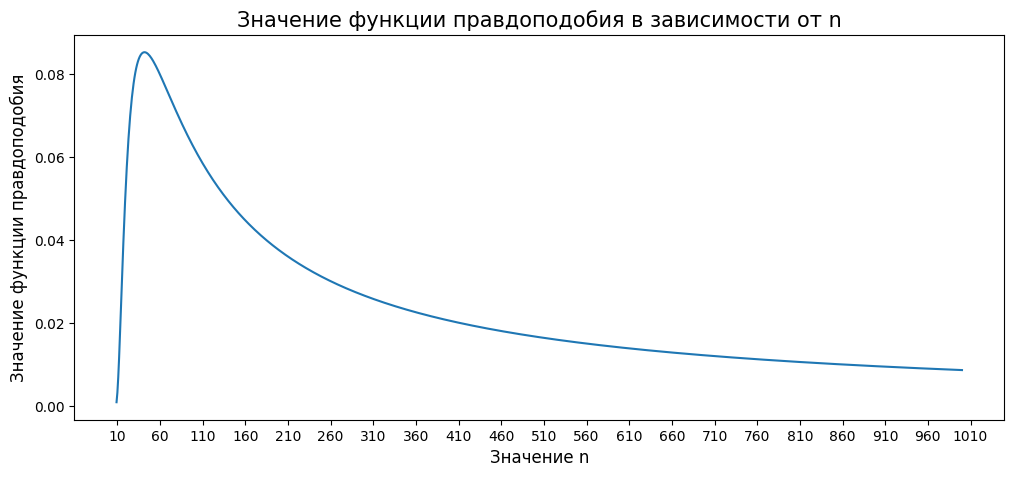

In [352]:
def L(n: int, end: int = 10) -> float:
    start = 1

    for i in range(1, end - 1):
        start *= (n - i) / n

    return (start * (end - 1)) / n

n_range = np.arange(9, 1001, 1)
res_ML = np.apply_along_axis(L, axis=0, arr=n_range)

plt.figure(figsize=(12, 5))
plt.plot(n_range, res_ML)
plt.xticks(np.arange(10, 1011, 50))
plt.xlabel('Значение n', fontsize=12)
plt.ylabel('Значение функции правдоподобия', fontsize=12)
plt.title('Значение функции правдоподобия в зависимости от n', fontsize=15)
plt.show()

In [353]:
print(f"Оценка числа таксистов ММП при 10 вызовах до первого повторения: {n_range[np.argmax(res_ML)]}")

Оценка числа таксистов ММП: 42


- ***Пункт $ б $***:

In [354]:
np.random.seed(42)

res_MM = []
n_range = np.arange(1, 1002, 1)

for n in n_range:
    taxis = []
    for i in range(10**2):
        k = 1

        while True:
            p = k / n
            taxi = np.random.choice([0, 1], p=[p, 1 - p])

            k += 1

            if not taxi:
                taxis.append(k)
                break

    res_MM.append(np.mean(taxis))

# ОЧЕНЬ ДОЛГО

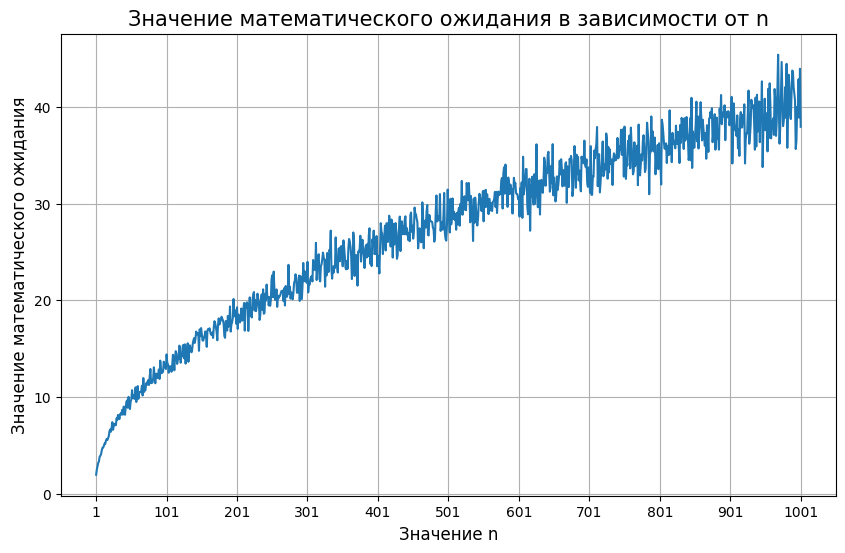

In [355]:
plt.figure(figsize=(10, 6))
plt.plot(n_range, res_MM)
plt.xticks(np.arange(1, 1002, 100))
plt.xlabel('Значение n', fontsize=12)
plt.ylabel('Значение математического ожидания', fontsize=12)
plt.title('Значение математического ожидания в зависимости от n', fontsize=15)
plt.grid()
plt.show()

In [361]:
res_MM = []
n_range_new = np.arange(1, 1501, 1)

for n in n_range_new:
    expect = 0

    for j in range(1, n + 2):
        expect += j * L(n, j)

    res_MM.append(expect)

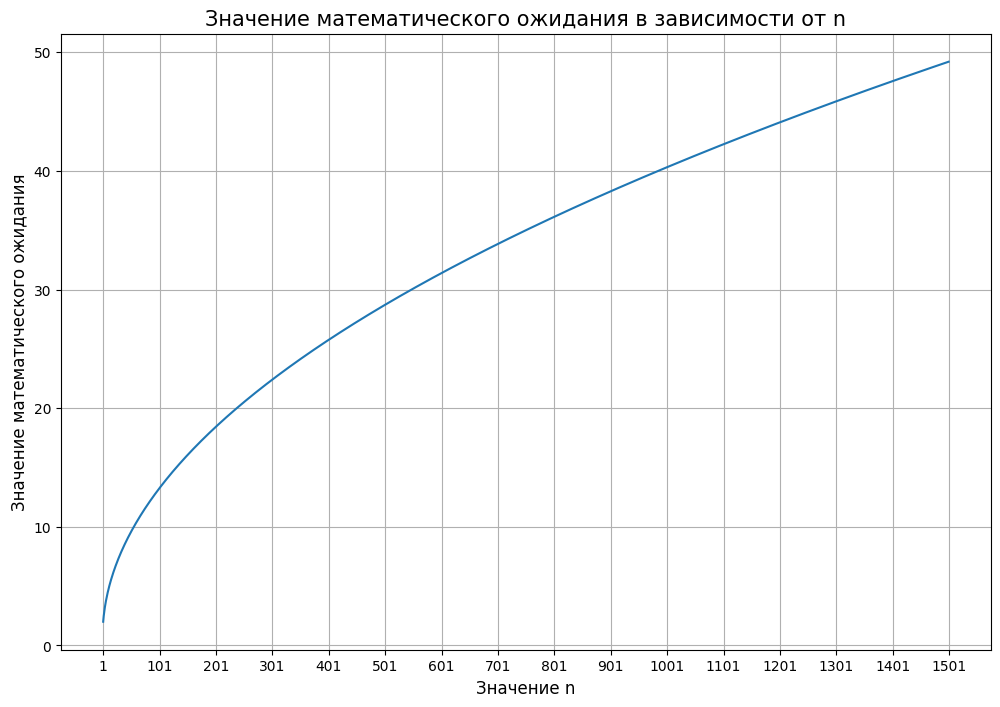

In [362]:
plt.figure(figsize=(12, 8))
plt.plot(n_range_new, res_MM)
plt.xticks(np.arange(1, 1502, 100))
plt.xlabel('Значение n', fontsize=12)
plt.ylabel('Значение математического ожидания', fontsize=12)
plt.title('Значение математического ожидания в зависимости от n', fontsize=15)
plt.grid()
plt.show()

In [363]:
print(f"Оценка числа таксистов ММ при 10 вызовах до первого повторения: {find_inverse_function(res_MM, n_range_new, 10)}")

Оценка числа таксистов ММ при 10 вызовах до первого повторения: 55


In [372]:
res_reversed = []
el_range = np.arange(1, 46, 5)

for el in el_range:
    res_reversed.append(find_inverse_function(res_MM, n_range_new, el))

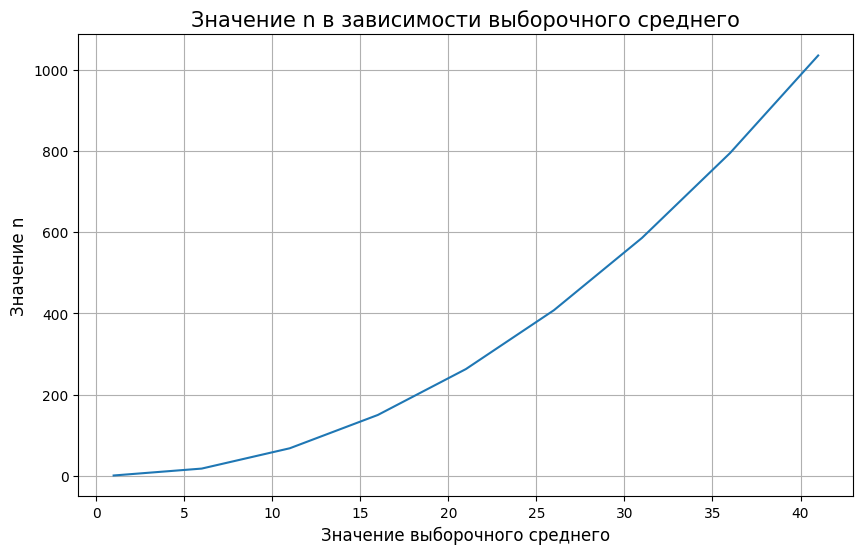

In [373]:
plt.figure(figsize=(10, 6))
plt.plot(el_range, res_reversed)
plt.xlabel('Значение выборочного среднего', fontsize=12)
plt.ylabel('Значение n', fontsize=12)
plt.title('Значение n в зависимости выборочного среднего', fontsize=15)
plt.grid()
plt.show()

- ***Пункт $ в $***:

In [375]:
def L_max(k: int) -> int:
    maximum = 0
    n_max = 0

    for i in range(1, 1002):
        like = L(i, k)
        
        if like > maximum:
            maximum = like
            n_max = i

    return n_max

In [376]:
np.random.seed(42)

MM_arr = []
ML_arr = []

for i in range(10**4):
    k = 1

    while True:
        p = k / 100
        taxi = np.random.choice([0, 1], p=[p, 1 - p])

        k += 1

        if not taxi:
            break

    MM_arr.append(find_inverse_function(res_MM, n_range_new, k))
    ML_arr.append(L_max(k))

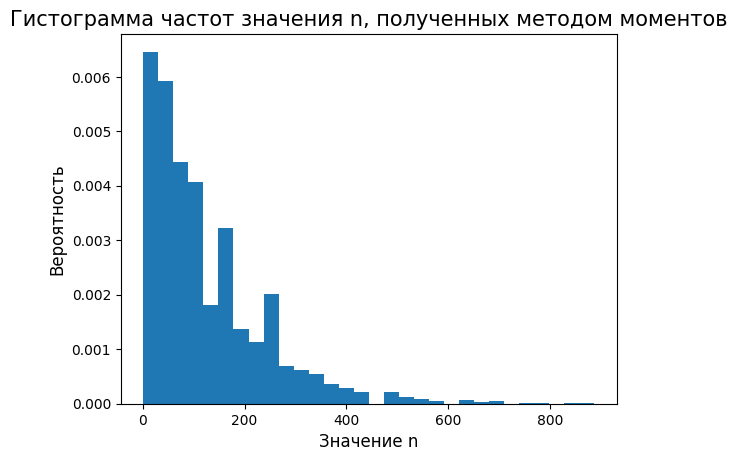

In [384]:
plt.hist(MM_arr, bins=30, density=True)
plt.xlabel('Значение n', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.title('Гистограмма частот значения n, полученных методом моментов', fontsize=15)
plt.show()

In [386]:
pd.DataFrame({"Смещение": np.mean(MM_arr) - 100,
              "Дисперсия": np.var(MM_arr, ddof=1),
              "Средняя квадратичная ошибка": np.sum(((np.array(MM_arr) - 100) ** 2) / 10 ** 4)}, index=["Metrics"])

,Смещение,Дисперсия,Средняя квадратичная ошибка
Metrics,24.4583,13601.728634,14198.5769


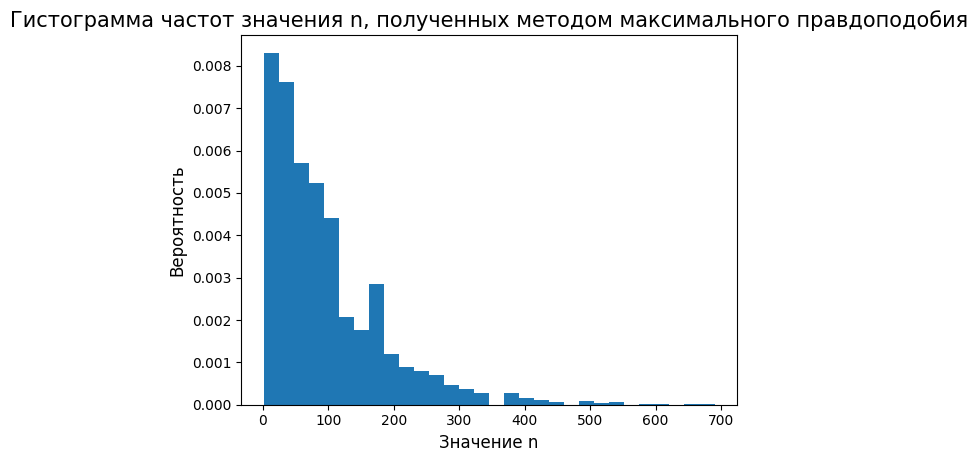

In [387]:
plt.hist(ML_arr, bins=30, density=True)
plt.xlabel('Значение n', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.title('Гистограмма частот значения n, полученных методом максимального правдоподобия', fontsize=15)
plt.show()

In [388]:
pd.DataFrame({"Смещение": np.mean(ML_arr) - 100,
              "Дисперсия": np.var(ML_arr, ddof=1),
              "Средняя квадратичная ошибка": np.sum(((np.array(ML_arr) - 100) ** 2) / 10 ** 4)}, index=["Metrics"])

,Смещение,Дисперсия,Средняя квадратичная ошибка
Metrics,-4.5998,8208.025042,8228.3624


> ## Задача 2

*Пусть есть n = 2 уникальных имен, такси вызываются m = 3 раза, турист встречает k = 2 уникальных таксистов.*

*Всего вариантов* $2^3$ $\Rightarrow$ $$P  = \frac{6}{8} = 0.75 $$

Пробуем формализовать: $$P = 1\cdot \frac{1}{n} \cdot \frac{n-1}{n} + 1\cdot \frac{n-1}{n} \cdot \frac{2}{n} = 1 \cdot \frac{1}{2} \cdot \frac{1}{2} + 1 \cdot \frac{1}{2} = \frac{1}{2} + \frac{1}{4} = 0.75$$

*Отсюда можно выводить закономерность о том, что в вероятности будет присутствовать множитель, как в прошлом номере:*

$$ 1 \cdot \frac{(n-1)}{n} \cdot \frac{(n-2)}{n} \cdot  \ ...  \ \cdot \frac{n-k+1}{n} $$

*Но помимо этого у нас присутствуют повторяющиеся имена, поэтому будут присутствовать множители вида $ \frac{l}{n} $ где $l$ это количество уже встреченных таксистов, в зависимости от того, где мы встречаем повторение. Таких множителей будет $m - k$, при этом в числителе куммулятивное произведение из последовательности чисел от 1 до k, в том числе с повторениями. Таких множителей будет m - k. Отмечу, что в данной конструкции можно вынести за скобки множитель $ 1 \cdot \frac{(n-1)}{n} \cdot \frac{(n-2)}{n} \cdot  \ ...  \ \cdot \frac{n-k+1}{n} $, и тогда в скобках для всех возможных случаев с конкретным $k$ будет присутствовать количество слагаемых, которое равно $C_{m-1}^{m-k}$, потому что мы как бы рассаживаем места, на которых происходят повторы по всем доступным для них, то есть по $m - 1$. Поэтому для записи формулы вероятности для каждого конкретного случая придется доставать произведения чисел от 1 до к с повторениями и длины m - k, что в общем виде записать довольно проблематично. Поэтому тут поможет itertools.*

- ***Пункт $ а $***:

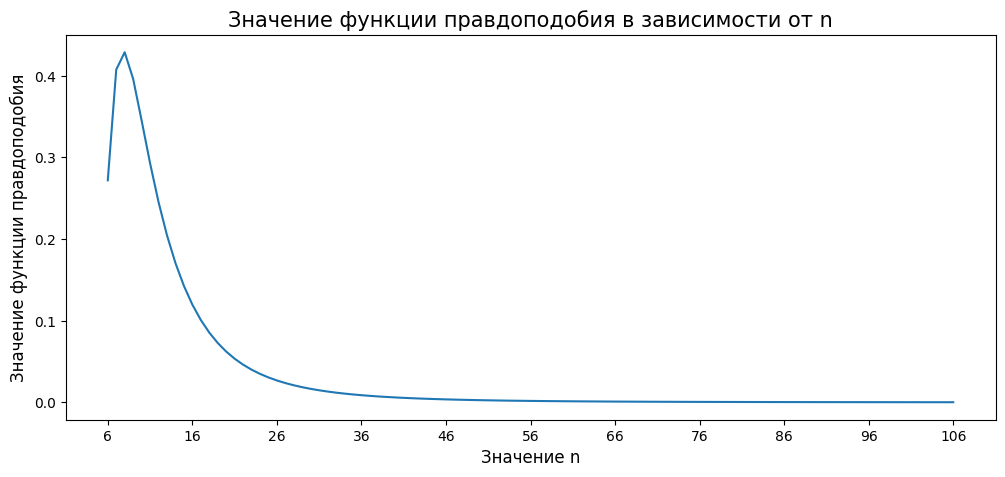

In [389]:
def L_names(n: int, k: int = 6, m: int = 10) -> float:
    prob = 1
    c = 0

    for i in range(1, k):
        prob *= (n - i) / n

    combinations = itertools.combinations_with_replacement(np.arange(1, k + 1, 1), m - k)

    for comb in combinations:
        prob_repeat = 1

        for i in range(m - k):
            prob_repeat *= comb[i]

        c += prob_repeat

    prob *= (c / (n ** (m - k)))

    return prob

n_range_names = np.arange(6, 107, 1)
res_ML_names = np.array([L_names(n) for n in n_range_names])

plt.figure(figsize=(12, 5))
plt.plot(n_range_names, res_ML_names)
plt.xticks(np.arange(6, 107, 10))
plt.xlabel('Значение n', fontsize=12)
plt.ylabel('Значение функции правдоподобия', fontsize=12)
plt.title('Значение функции правдоподобия в зависимости от n', fontsize=15)
plt.show()

In [390]:
print(f"Оценка числа таксистов ММП: {n_range_names[np.argmax(res_ML_names)]}")

Оценка числа таксистов ММП: 8


- ***Пункт $ б $***:

In [391]:
res_MM_names = []
m = 10
n_range_names_new = np.arange(1, 501, 1)

for n in n_range_names_new:
    expect = 0

    for j in range(1, m + 1):
        expect += j * L_names(n, j)

    res_MM_names.append(expect)

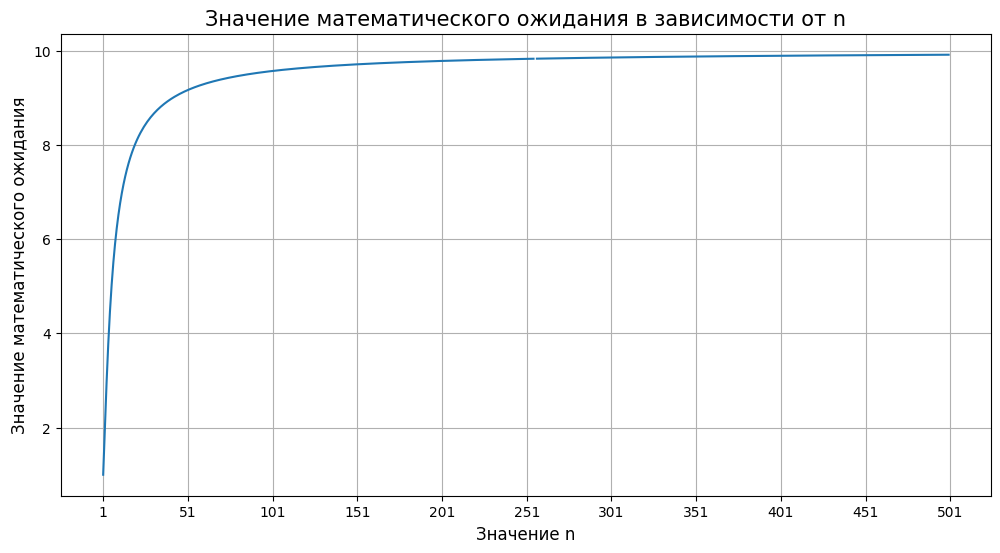

In [392]:
plt.figure(figsize=(12, 6))
plt.plot(n_range_names_new, res_MM_names)
plt.xticks(np.arange(1, 502, 50))
plt.xlabel('Значение n', fontsize=12)
plt.ylabel('Значение математического ожидания', fontsize=12)
plt.title('Значение математического ожидания в зависимости от n', fontsize=15)
plt.grid()
plt.show()

In [393]:
print(f"Оценка числа имен таксистов ММ: {find_inverse_function(res_MM_names, n_range_names_new, 6)}")

Оценка числа имен таксистов ММ: 8


- ***Пункт $ в $***:

In [394]:
def L_max_names(k: int) -> int:
    maximum = 0
    n_max = 0
    like = 0

    for i in range(k, 101):
        like = L_names(i, k, m=10)
        
        if like > maximum:
            maximum = like
            n_max = i

    return n_max

In [395]:
res_MM_names = []
m = 10
n_range_names_new = np.arange(1, 101, 1)

for n in n_range_names_new:
    expect = 0

    for j in range(1, m + 1):
        expect += j * L_names(n, j, m=10)

    res_MM_names.append(expect)

In [396]:
k_range = np.arange(1, 11, 1)
res_ML_names = np.array([L_max_names(k) for k in k_range])
res_ML_names

array([  1,   2,   3,   4,   5,   8,  12,  19,  42, 100])

In [397]:
np.random.seed(42)

MM_arr_names = []
ML_arr_names = []

for i in range(10**4):
    k = 1

    for j in range(9):
        p = k / 20
        taxi_name = np.random.choice([0, 1], p=[p, 1 - p])

        if taxi_name:
            k += 1

    MM_arr_names.append(find_inverse_function(res_MM_names, n_range_names_new, k))
    ML_arr_names.append(res_ML_names[k - 1])

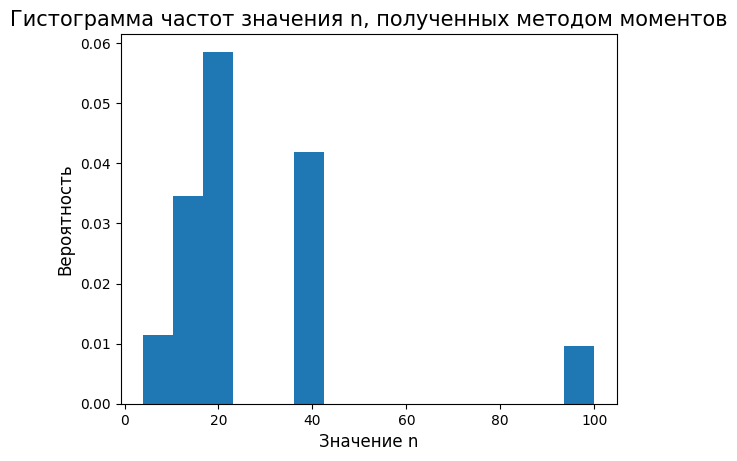

In [402]:
plt.hist(MM_arr_names, bins=15, density=True)
plt.xlabel('Значение n', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.title('Гистограмма частот значения n, полученных методом моментов', fontsize=15)
plt.show()

In [403]:
pd.DataFrame({"Смещение": np.mean(MM_arr_names) - 20,
              "Дисперсия": np.var(MM_arr_names, ddof=1),
              "Средняя квадратичная ошибка": np.sum(((np.array(MM_arr_names) - 20) ** 2) / 10 ** 4)}, index=["Metrics"])

,Смещение,Дисперсия,Средняя квадратичная ошибка
Metrics,8.1858,484.731151,551.69


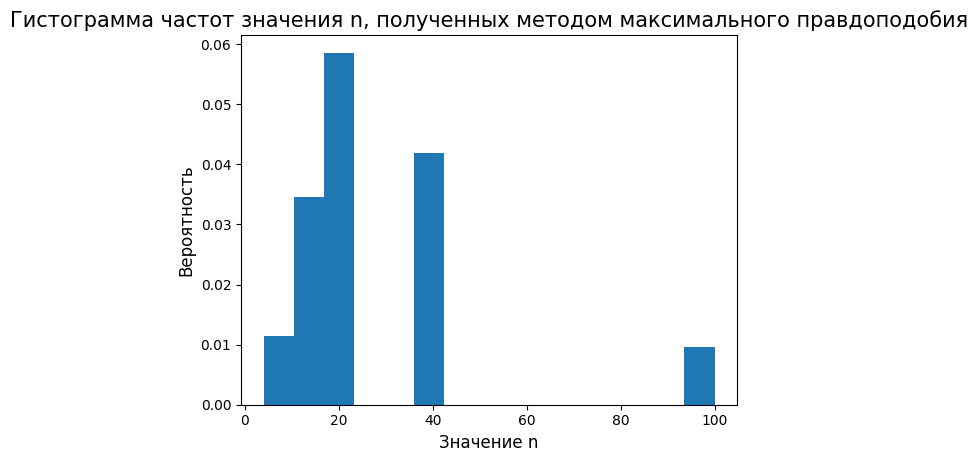

In [405]:
plt.hist(ML_arr_names, bins=15, density=True)
plt.xlabel('Значение n', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.title('Гистограмма частот значения n, полученных методом максимального правдоподобия', fontsize=15)
plt.show()

In [407]:
pd.DataFrame({"Смещение": np.mean(ML_arr_names) - 20,
              "Дисперсия": np.var(ML_arr_names, ddof=1),
              "Средняя квадратичная ошибка": np.sum(((np.array(ML_arr_names) - 20) ** 2) / 10 ** 4)}, index=["Metrics"])

,Смещение,Дисперсия,Средняя квадратичная ошибка
Metrics,7.8035,491.431231,552.2767


> ## Задача 3

In [408]:
n = 20
num_simulations = 10**4

# Функция для вычисления 95%-го доверительного интервала классического асимптотического нормального интервала
def classical_normal_interval(data: np.array) -> np.array:
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1, ddof=1)
    z_critical = sts.norm.ppf(0.975)

    lower_bounds = means - z_critical * (stds / np.sqrt(n))
    upper_bounds = means + z_critical * (stds / np.sqrt(n))

    return np.column_stack((lower_bounds, upper_bounds))

# Функция для вычисления 95%-го доверительного интервала наивного бутстрэпа
def naive_bootstrap_interval(data_line: np.array) -> np.array:
    bootstrap_samples = np.random.choice(data_line, size=(num_simulations, n))

    means = np.mean(bootstrap_samples, axis=1)

    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)

    return lower_bound, upper_bound

# Функция для вычисления 95%-го доверительного интервала бутстрэпа t-статистики
def bootstrap_t_interval(data_line: np.array) -> np.array:
    mean_true = np.mean(data_line)
    bootstrap_samples = np.random.choice(data_line, size=(num_simulations, n))

    means = np.mean(bootstrap_samples, axis=1)
    stds = np.std(bootstrap_samples, axis=1, ddof=1)
    standard_rand_val = (means - mean_true) / (stds / np.sqrt(n))

    lower_bound = np.percentile(standard_rand_val, 2.5)
    upper_bound = np.percentile(standard_rand_val, 97.5)

    return lower_bound, upper_bound

- ***Пункт $ a $***

In [409]:
np.random.seed(42)

# Задаем параметры экспоненциального распределения
lambda_param = 1

# Вычисляем фактическое математическое ожидание
true_mean = 1 / lambda_param

# Генерируем все наблюдения одновременно
data = sts.expon.rvs(scale=true_mean, size=(num_simulations, n))

# Вычисляем вектор стандартизированных величин, для первого шага t-бутстрепа
true_vec = (np.mean(data, axis=1) - true_mean) / (np.std(data, axis=1, ddof=1) / np.sqrt(n))

# Вычисляем доверительные интервалы для каждого способа
classical_intervals = classical_normal_interval(data)
naive_intervals = np.apply_along_axis(naive_bootstrap_interval, axis=1, arr=data)
bootstrap_t_intervals = np.apply_along_axis(bootstrap_t_interval, axis=1, arr=data)

# Проверяем, накрывает ли каждый доверительный интервал фактическое математическое ожидание
prob_classical = np.mean((classical_intervals[:, 0] <= true_mean) & (classical_intervals[:, 1] >= true_mean))
prob_naive = np.mean((naive_intervals[:, 0] <= true_mean) & (naive_intervals[:, 1] >= true_mean))
prob_bootstrap_t = np.mean((bootstrap_t_intervals[:, 0] <= true_vec) & (bootstrap_t_intervals[:, 1] >= true_vec))

# Выводим результаты
print("Вероятность накрытия фактического математического ожидания номинальным 95%-м доверительным интервалом:")
print("Классический асимптотический нормальный интервал:", prob_classical)
print("Наивный бутстрэп:", prob_naive)
print("Бутстрэп t-статистики:", prob_bootstrap_t)

Вероятность накрытия фактического математического ожидания номинальным 95%-м доверительным интервалом:
Классический асимптотический нормальный интервал: 0.9036
Наивный бутстрэп: 0.9029
Бутстрэп t-статистики: 0.9467


- ***Пункт $ б $***

In [410]:
np.random.seed(42)

# Задаем параметры t-распределения распределения
t_param = 0

# Вычисляем фактическое математическое ожидание
true_mean = 0

# Генерируем все наблюдения одновременно
data = sts.t.rvs(size=(num_simulations, n), df=3)

# Вычисляем вектор стандартизированных величин, для первого шага t-бутстрепа
true_vec = (np.mean(data, axis=1) - true_mean) / (np.std(data, axis=1, ddof=1) / np.sqrt(n))

# Вычисляем доверительные интервалы для каждого способа
classical_intervals = classical_normal_interval(data)
naive_intervals = np.apply_along_axis(naive_bootstrap_interval, axis=1, arr=data)
bootstrap_t_intervals = np.apply_along_axis(bootstrap_t_interval, axis=1, arr=data)

# Проверяем, накрывает ли каждый доверительный интервал фактическое математическое ожидание
prob_classical = np.mean((classical_intervals[:, 0] <= true_mean) & (classical_intervals[:, 1] >= true_mean))
prob_naive = np.mean((naive_intervals[:, 0] <= true_mean) & (naive_intervals[:, 1] >= true_mean))
prob_bootstrap_t = np.mean((bootstrap_t_intervals[:, 0] <= true_vec) & (bootstrap_t_intervals[:, 1] >= true_vec))

# Выводим результаты
print("Вероятность накрытия фактического математического ожидания номинальным 95%-м доверительным интервалом:")
print("Классический асимптотический нормальный интервал:", prob_classical)
print("Наивный бутстрэп:", prob_naive)
print("Бутстрэп t-статистики:", prob_bootstrap_t)

Вероятность накрытия фактического математического ожидания номинальным 95%-м доверительным интервалом:
Классический асимптотический нормальный интервал: 0.9438
Наивный бутстрэп: 0.9195
Бутстрэп t-статистики: 0.9232


- ***Пункт $ в $***

1) Для экспоненциального распределения наилучший результат показал метод t-бутстрапа. Это объясняется тем, что наивный метод не учитывает стандартную ошибку, в то время как для получения более точных оценок требуется больше наблюдений. Метод t-бутстрапа учитывает стандартную ошибку и предоставляет более точные результаты.

2) Для стьюдентизированного распределения лучшим методом является построение доверительного интервала (ДИ). Это логично, поскольку при использовании ДИ фактически строится t-статистика, которая при правильном распределении Стьюдента дает наиболее точные оценки. Поэтому использование ДИ для стьюдентизированного распределения является логичным и предоставляет точные оценки параметров.

> ## Задача 4

In [411]:
df = pd.read_csv("/Users/ivansidorov/Downloads/ОЦЕНКИ.csv", sep=';')

df.head()

,Фамилия,Результат
0,Репенкова,16
1,Ролдугина,0
2,Сафина,19
3,Сидоров,26
4,Солоухин,21


In [412]:
df["Результат"] = df["Результат"].astype("int")
df["Результат"].dtype

dtype('int64')

In [413]:
vowels = set(['а', 'е', 'ё', 'и', 'о', 'у', 'ы', 'э', 'ю', 'я'])

def vowel_first(s: str) -> bool:
    return s[0].lower() in vowels

df['first_vowel_check'] = df['Фамилия'].apply(vowel_first)

sur_vowel = df["Результат"][df['first_vowel_check']].values
sur_consonant = df["Результат"][~(df['first_vowel_check'])].values

- ***Пункт $ а $***

In [414]:
n_x, n_y = sur_vowel.size, sur_consonant.size
mean_x, mean_y = np.mean(sur_vowel), np.mean(sur_consonant)
var_x, var_y = np.var(sur_vowel, ddof=1), np.var(sur_consonant, ddof=1)
standard_error = np.sqrt((var_x / n_x + var_y / n_y))
t_critical = sts.t.ppf(q=0.975, df=d)

d = (standard_error ** 4) / ((var_x ** 2) / (((n_x ** 2) * (n_x - 1))) + ((var_y ** 2) / ((n_y ** 2) * (n_y - 1))))
mean_real = mean_x - mean_y
sеtandart_rand_val_real = (mean_real - 0) / standard_error

lower_bound = mean_real - t_critical * standard_error
upper_bound = mean_real + t_critical * standard_error

p_value = 2 * np.min((sts.t.cdf(sеtandart_rand_val_real, df=d), 1 - sts.t.cdf(sеtandart_rand_val_real, df=d)))

print(f"Оценка количества степеней свободы t-распределения по Уэлчу: {d}")
print(f"mean_real: {mean_real}")
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")
print(f"p_value: {p_value}")

if lower_bound <= mean_real <= upper_bound:
    print("H_0 не отвергается")
else:
    print("H_0 отвергается")

Оценка количества степеней свободы t-распределения по Уэлчу: 64.14171777194895
mean_real: -1.0782433114588574
lower_bound: -3.6064504338479955
upper_bound: 1.4499638109302806
p_value: 0.3974027153843839
H_0 не отвергается


- ***Пункт $ б $***

In [415]:
np.random.seed(42)

def naive_bootstrap_interval_two_samples(data_x_line: np.array, data_y_line: np.array):
    bootstrap_x_samples = np.random.choice(data_x_line, size=(num_simulations, data_x_line.size))
    bootstrap_y_samples = np.random.choice(data_y_line, size=(num_simulations, data_y_line.size))

    means_x = np.mean(bootstrap_x_samples, axis=1)
    means_y = np.mean(bootstrap_y_samples, axis=1)
    means_diff = means_x - means_y

    lower_bound = np.percentile(means_diff, 2.5)
    upper_bound = np.percentile(means_diff, 97.5)

    return lower_bound, upper_bound, means_diff

lower_bound, upper_bound, means_diff = naive_bootstrap_interval_two_samples(sur_vowel, sur_consonant)

p_value = 2 * (np.min([np.mean((mean_real <= means_diff)), np.mean(mean_real > means_diff)]))

print(f"mean_real: {mean_real}")
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")
print(f"p_value: {p_value}")

if lower_bound <= mean_real <= upper_bound:
    print("H_0 не отвергается")
else:
    print("H_0 отвергается")

mean_real: -1.0782433114588574
lower_bound: -3.54700187495493
upper_bound: 1.4171089637268302
p_value: 0.9868
H_0 не отвергается


- ***Пункт $ в $***

In [416]:
np.random.seed(42)

def bootstrap_t_interval_two_samples(data_x_line: np.array, data_y_line: np.array):
    mean_x_true = np.mean(data_x_line)
    mean_y_true = np.mean(data_y_line)
    mean_diff_true = mean_x_true - mean_y_true

    bootstrap_x_samples = np.random.choice(data_x_line, size=(num_simulations, data_x_line.size))
    bootstrap_y_samples = np.random.choice(data_y_line, size=(num_simulations, data_y_line.size))

    means_x = np.mean(bootstrap_x_samples, axis=1)
    means_y = np.mean(bootstrap_y_samples, axis=1)
    means_diff = means_x - means_y

    stds = np.sqrt((np.var(bootstrap_x_samples, axis=1, ddof=1) / data_x_line.size) + (np.var(bootstrap_y_samples, axis=1, ddof=1) / data_y_line.size))
    standard_rand_vals = (means_diff - mean_diff_true) / stds

    lower_bound = np.percentile(standard_rand_vals, 2.5)
    upper_bound = np.percentile(standard_rand_vals, 97.5)

    return lower_bound, upper_bound, standard_rand_vals

lower_bound, upper_bound, standard_rand_vals = bootstrap_t_interval_two_samples(sur_vowel, sur_consonant)

p_value = 2 * (np.min([np.mean((sеtandart_rand_val_real <= standard_rand_vals)), np.mean(sеtandart_rand_val_real > standard_rand_vals)]))

print(f"sеtandart_rand_val_real: {sеtandart_rand_val_real}")
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")
print(f"p_value: {p_value}")

if lower_bound <= sеtandart_rand_val_real <= upper_bound:
    print("H_0 не отвергается")
else:
    print("H_0 отвергается")

sеtandart_rand_val_real: -0.8519661870595602
lower_bound: -1.9027473863418036
upper_bound: 2.155464489795715
p_value: 0.3854
H_0 не отвергается


- ***Пункт $ г $***

In [417]:
np.random.seed(42)

def permutation_interval_two_samples(data_x_line: np.array, data_y_line: np.array):
    data_line = np.append(data_x_line, data_y_line)
    mean_diffs = []

    for i in range(num_simulations):
        permutation = np.random.permutation(data_line)
        permutation_x_sample = permutation[df['first_vowel_check']]
        permutation_y_sample = permutation[~(df['first_vowel_check'])]

        mean_diffs.append(np.mean(permutation_x_sample) - np.mean(permutation_y_sample))
        
    lower_bound = np.percentile(mean_diffs, 2.5)
    upper_bound = np.percentile(mean_diffs, 97.5)

    return lower_bound, upper_bound, mean_diffs

lower_bound, upper_bound, mean_diffs = permutation_interval_two_samples(sur_vowel, sur_consonant)

p_value = 2 * (np.min([np.mean((mean_real <= mean_diffs)), np.mean(mean_real > mean_diffs)]))

print(f"mean_real: {mean_real}")
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")
print(f"p_value: {p_value}")

if lower_bound <= mean_real <= upper_bound:
    print("H_0 не отвергается")
else:
    print("H_0 отвергается")

mean_real: -1.0782433114588574
lower_bound: -2.4429220451431455
upper_bound: 2.321482656666907
p_value: 0.3734
H_0 не отвергается


> ## Задача 5

In [418]:
surname = np.concatenate([sur_vowel, sur_consonant])
median = np.median(surname)

vowel_greater_median = np.sum(sur_vowel >= median)
vowel_lower_median = np.sum(sur_vowel < median)

consonant_greater_median = np.sum(sur_consonant >= median)
consonant_lower_median = np.sum(sur_consonant < median)

matrix = np.array([[vowel_greater_median, vowel_lower_median], [consonant_greater_median, consonant_lower_median]])
matrix

array([[ 21,  28],
       [145, 138]])

In [419]:
norm = sts.norm(loc = 0, scale = 1)

In [420]:
def calculate_odds_ratio_ci(matrix):
    p_1 = matrix[0, 0] / np.sum(matrix[0])
    p_2 = matrix[1, 0] / np.sum(matrix[1])
    odds_ratio = (p_1 * (1 - p_2)) / (p_2 * (1 - p_1))
    log_odds_ratio = np.log(odds_ratio)

    se = np.sqrt(1 / matrix[0, 0] + 1 / matrix[0, 1] + 1 / matrix[1, 0] + 1 / matrix[1, 1])
    z_critical = sts.norm.ppf(0.975)

    lower_bound = np.exp(log_odds_ratio - z_critical * se)
    upper_bound = np.exp(log_odds_ratio + z_critical * se)

    odds_ratio_real = (log_odds_ratio - 0) / se

    return odds_ratio_real, lower_bound, upper_bound

def calculate_probability_ratio_ci(matrix):
    p1 = matrix[0, 0] / (matrix[0, 0] + matrix[0, 1])
    p2 = matrix[1, 0] / (matrix[1, 0] + matrix[1, 1])
    ratio = p1 / p2
    log_ratio = np.log(ratio)

    var = (1 - p1) / (p1 * (matrix[0, 0] + matrix[0, 1])) + (1 - p2) / (p2 * (matrix[1, 0] + matrix[1, 1]))
    se = np.sqrt(var)

    z_critical = sts.norm.ppf(0.975)

    lower_bound = np.exp(np.log(ratio) - z_critical * se)
    upper_bound = np.exp(np.log(ratio) + z_critical * se)

    ratio_real = (log_ratio - 0) / se

    return ratio_real, lower_bound, upper_bound

def bootstrap_odds_ratio(matrix):
    p_1 = matrix[0, 0] / np.sum(matrix[0])
    p_2 = matrix[1, 0] / np.sum(matrix[1])
    odds_ratio_real = (p_1 * (1 - p_2)) / (p_2 * (1 - p_1))

    odds_ratios = []

    for i in range(num_simulations):
        
        bootstrap_sample_1 = np.random.choice(sur_vowel, size=sur_vowel.size)
        bootstrap_sample_2 = np.random.choice(sur_consonant, size=sur_consonant.size)

        vowel_greater_median = np.sum(bootstrap_sample_1 >= median)
        vowel_lower_median = np.sum(bootstrap_sample_1 < median)

        consonant_greater_median = np.sum(bootstrap_sample_2 >= median)
        consonant_lower_median = np.sum(bootstrap_sample_2 < median)

        matrix = np.array([[vowel_greater_median, vowel_lower_median], [consonant_greater_median, consonant_lower_median]])

        p_1 = matrix[0, 0] / np.sum(matrix[0])
        p_2 = matrix[1, 0] / np.sum(matrix[1])

        odds_ratio = (p_1 * (1 - p_2)) / (p_2 * (1 - p_1))

        odds_ratios.append(odds_ratio)

    lower_bound = np.percentile(odds_ratios, 2.5)
    upper_bound = np.percentile(odds_ratios, 97.5)

    return odds_ratio_real, odds_ratios, lower_bound, upper_bound

- ***Пункт $ a $***

In [421]:
odds_ratio_real, lower_bound, upper_bound = calculate_odds_ratio_ci(matrix)
print("95% асимптотический интервал для отношения шансов:")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")
print(f"P-value: {2 * np.min([norm.cdf(odds_ratio_real), 1 - norm.cdf(odds_ratio_real)])}")

if odds_ratio_lower <= 1 <= odds_ratio_upper:
    print("H_0 не отвергается")
else:
    print("H_0 отвергается")

95% асимптотический интервал для отношения шансов:
Нижняя граница: 0.38709459582547817
Верхняя граница: 1.3162172761513566
P-value: 0.2801802745664512
H_0 не отвергается


- ***Пункт $ б $***

In [422]:
ratio_real, lower_bound, upper_bound = calculate_probability_ratio_ci(matrix)
print("б) 95% асимптотический интервал для отношения вероятностей:")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")
print(f"P-value: {2 * np.min([norm.cdf(ratio_real), 1 - norm.cdf(ratio_real)])}")

# Проверка гипотезы о том, что отношение вероятностей равно 1
if probability_ratio_lower <= 1 <= probability_ratio_upper:
    print("H_0 не отвергается")
else:
    print("H_0 отвергается")

б) 95% асимптотический интервал для отношения вероятностей:
Нижняя граница: 0.5937529565040844
Верхняя граница: 1.1783586951819993
P-value: 0.3070947928050547
H_0 не отвергается


- ***Пункт $ в $***

In [423]:
np.random.seed(42)

odds_ratio_real, odds_ratios, lower_bound, upper_bound = bootstrap_odds_ratio(matrix)
print("95% интервал для отношения шансов с помощью наивного бутстрэпа:")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")
print(f"P-value: {2 * (np.min([np.mean((odds_ratios >= odds_ratio_real)), np.mean(odds_ratios < odds_ratio_real)]))}")

if bootstrap_odds_ratio_lower <= 1 <= bootstrap_odds_ratio_upper:
    print("H_0 не отвергается")
else:
    print("H_0 отвергается")

95% интервал для отношения шансов с помощью наивного бутстрэпа:
Нижняя граница: 0.367400715226802
Верхняя граница: 1.3304347826086962
P-value: 0.9922
H_0 не отвергается


> ## Задача 6

- ***Пункт $ а $***

In [424]:
dt = pd.read_csv("/Users/ivansidorov/Downloads/ОЦЕНКИ.csv", sep=';')
dt['Фамилия'] = dt['Фамилия'].apply(len)

dt.head()

,Фамилия,Результат
0,9,16
1,9,0
2,6,19
3,7,26
4,8,21


In [425]:
beta = np.mean(dt['Результат']) / np.mean(dt['Фамилия'])
beta

2.0613026819923372

- ***Пункт $ б $***

In [426]:
surname_length = dt['Фамилия']
res = dt['Результат']
corr_obs = np.corrcoef(surname_length, res)[0][1]
corr_obs

0.025328052669147665

In [427]:
np.random.seed(42)

corrs = []

for i in range(num_simulations):
    surname_permutation = np.random.permutation(surname_length)
    corr = np.corrcoef(surname_permutation, res)[0][1]
    corrs.append(corr)

lower_bound = np.percentile(corrs, 0.025)
upper_bound = np.percentile(corrs, 0.975)

print(f"P-value: {2 * (np.min([np.mean((corrs >= corr_obs)), np.mean(corrs < corr_obs)]))}")

if lower_bound <= 0 <= upper_bound:
    print("H_0 не отвергается")
else:
    print("H_0 отвергается")

P-value: 0.6516
H_0 отвергается


> ## Задача 7

https://chat.openai.com/share/3597b832-cab7-4c38-9607-5baa0f9a4ac5

> ## Задача 8

1) Иногда на лекциях могло не хватать доказательств некоторых теорем или математических выкладок,
поэтому я обращался к учебникам Шведова, тк они очень похожи на по материалу на лекции:
Алексей Шведов, Теория вероятностей и математическая статистика: пособие для вузов
Алексей Шведов, Теория вероятностей и математическая статистика - 2 (промежуточный уровень): учеб. пособие
По той же причине (плюс было интересно почитать про производящие функции): https://core.ac.uk/download/pdf/287482466.pdf

2) В прошлом семестре также было интересно поразбирать задачи из следующего сборника задач на монетки: https://sites.math.washington.edu/~mathcircle/circle/2015-16/second/PenneyAnte.pdf. Для того чтобы пощупать на простых задачах такие методы как отрезание ушей, первый шаг и так далее.

3) Кроме того для более глубокого понимания иногда смотрел лекции физтеха по теории вероятностей: https://www.youtube.com/playlist?list=PLyBWNG-pZKx7kLBRcNW3HXG05BDUrTQVr.